In [1]:
from mdcrow import MDCrow
import os 
import mdtraj as md

In [2]:
descriptive_prompt_8 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Simulate for 1 ps at 400 K. 7. Compute the RMSD of the simulation at 400 K. 8. Compute the radius of gyration over time for the simulation at 400 K."
non_descriptive_prompt_8 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD and radius of gyration of both simulations."

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- Simulation_2
- RMSD_2
- Rgy_2

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_8)

Thought: To complete all these tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": "1LYZ"
}
```Thought: I apologize for the confusion in my previous approach. It seems the GetTurnsBetaSheetsHelices tool didn't provide the information we need. Let's try a different approach to get the structural information we're looking for.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {"traj_file": "1LYZ_184401", "top_file": "1LYZ_184401"}
```I apologize for the error in my previous response. Let me provide a correct response that follows the given instructions:


({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [6]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_184401: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_184401
 1LYZ_184433: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_184436: Initial positions for simulation sim0_184436
 sim0_184436: Basic Simulation of Protein 1LYZ_184433
 rec0_184437: Simulation trajectory for protein 1LYZ_184433 and simulation sim0_184436
 rec1_184437: Simulation state log for protein 1LYZ_184433 and simulation sim0_184436
 rec2_184437: Simulation pdb frames for protein 1LYZ_184433 and simulation sim0_184436
 rmsd_184436: RMSD for 184436
 fig0_184507: RMSD plot for 184436
 rgy_rec0_184437: Radii of gyration per frame for rec0_184437
 fig0_184510: Plot of radii of gyration over time for rec0_184437
 top_sim0_184513: Initial positions for simulation sim0_184513
 sim0_184513: Basic Simulation of Protein 1LYZ_184433
 rec0_184514: Simulation trajectory f

In [7]:
assert os.path.exists(registry.get_mapped_path("rec0_184437"))
assert os.path.exists(registry.get_mapped_path("top_sim0_184436"))
assert os.path.exists(registry.get_mapped_path("rmsd_184436"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_184437"))


assert os.path.exists(registry.get_mapped_path("rec0_184514"))
assert os.path.exists(registry.get_mapped_path("top_sim0_184513"))
assert os.path.exists(registry.get_mapped_path("rmsd_184513"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_184514"))

assert os.path.exists(registry.get_mapped_path("1LYZ_184401"))

In [28]:
from mdcrow.tools.base_tools import SummarizeProteinStructure
sps = SummarizeProteinStructure(registry)
sps._run(traj_file="1LYZ_184401", top_file="1LYZ_184401")

"{'n_atoms': 1102, 'n_residues': 230, 'n_chains': 2, 'n_frames': 1, 'n_bonds': 1025}"

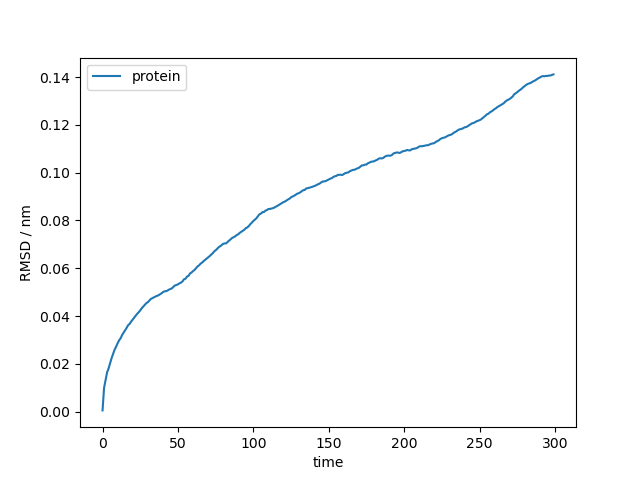

In [8]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184507'))

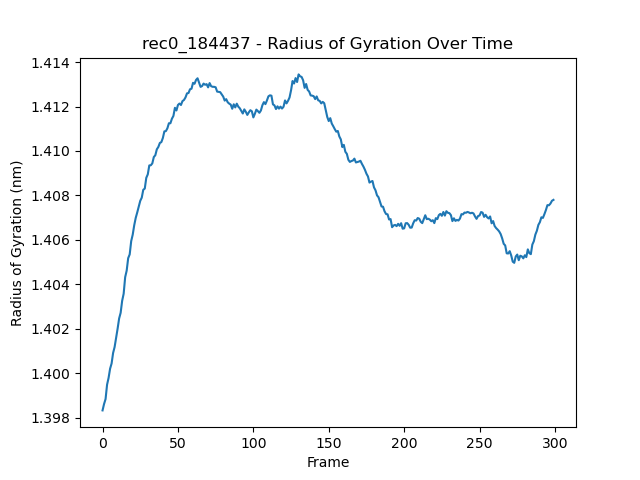

In [9]:
#plot rgy1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184510'))

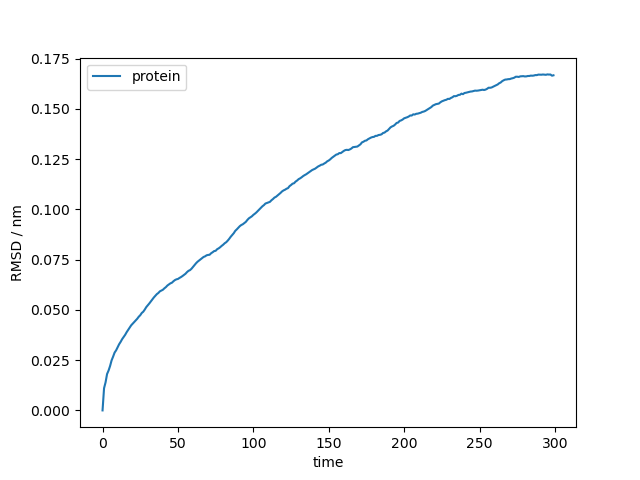

In [10]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184539'))

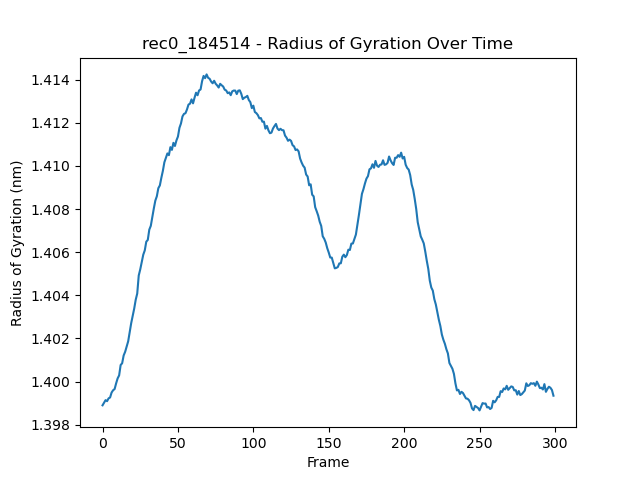

In [11]:
#plot rgy2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_184542'))

In [12]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_8)

Thought: To address this question, we need to follow several steps. First, we'll download the PDB file for 1LYZ, set up and run simulations at 300K and 400K, analyze the structure, and then compute the requested metrics. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run simulations at 300K and 400K. We'll start with the 300K simulation.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_185445",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
       

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [14]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_185445: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_185445
 1LYZ_185456: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185500: Initial positions for simulation sim0_185500
 sim0_185500: Basic Simulation of Protein 1LYZ_185456
 rec0_185504: Simulation trajectory for protein 1LYZ_185456 and simulation sim0_185500
 rec1_185504: Simulation state log for protein 1LYZ_185456 and simulation sim0_185500
 rec2_185504: Simulation pdb frames for protein 1LYZ_185456 and simulation sim0_185500
 top_sim0_190031: Initial positions for simulation sim0_190031
 sim0_190031: Basic Simulation of Protein 1LYZ_185456
 rec0_190036: Simulation trajectory for protein 1LYZ_185456 and simulation sim0_190031
 rec1_190036: Simulation state log for protein 1LYZ_185456 and simulation sim0_190031
 rec2_190036: Simulation pdb frames for protein 1LYZ_1854

In [18]:
assert os.path.exists(registry_2.get_mapped_path("rec0_185504"))
assert os.path.exists(registry_2.get_mapped_path("top_sim0_185500"))
assert os.path.exists(registry_2.get_mapped_path("rmsd_185500"))
assert os.path.exists(registry_2.get_mapped_path("rgy_rec0_185504"))


assert os.path.exists(registry_2.get_mapped_path("rec0_190036"))
assert os.path.exists(registry_2.get_mapped_path("top_sim0_190031"))
assert os.path.exists(registry_2.get_mapped_path("rmsd_190031"))
assert os.path.exists(registry_2.get_mapped_path("rgy_rec0_190036"))

assert os.path.exists(registry_2.get_mapped_path("1LYZ_185456"))

In [20]:
from mdcrow.tools.base_tools import SummarizeProteinStructure

sps = SummarizeProteinStructure(registry_2)
sps._run(traj_file="rec0_185504", top_file="top_sim0_185500")

"{'n_atoms': 22320, 'n_residues': 6921, 'n_chains': 3, 'n_frames': 300, 'n_bonds': 15552}"

In [19]:
from mdcrow.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file="rec0_185504", top_file="top_sim0_185500", target_frames="last")

"{'residues in helix': 41, 'residues in strand': 14, 'residues in coil': 74, 'residues not assigned, not a protein residue': 6792}"

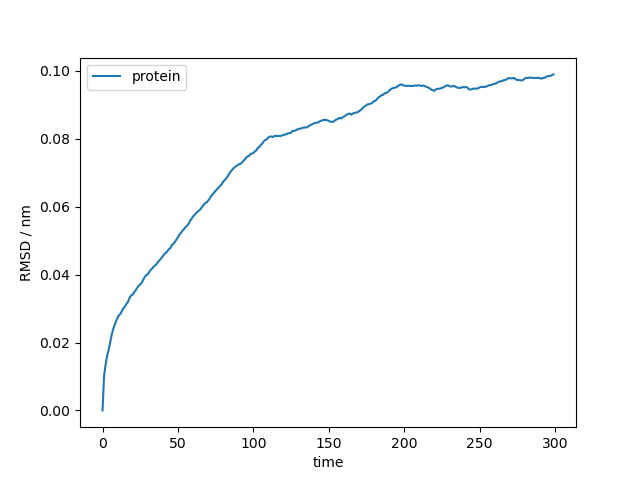

In [23]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_190702'))

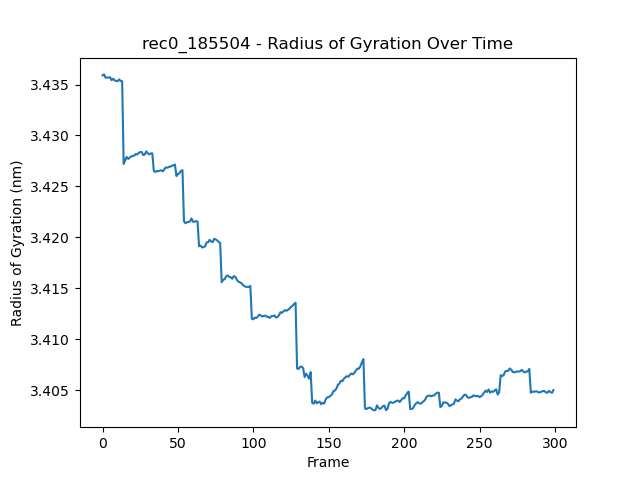

In [24]:
#plot rgy1
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_190710'))

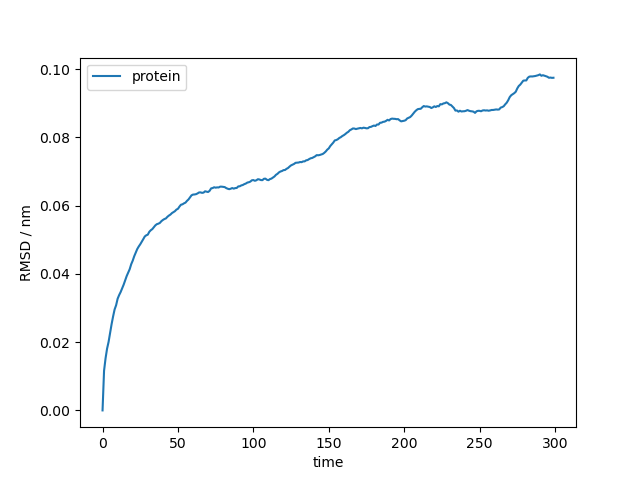

In [25]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_190705'))

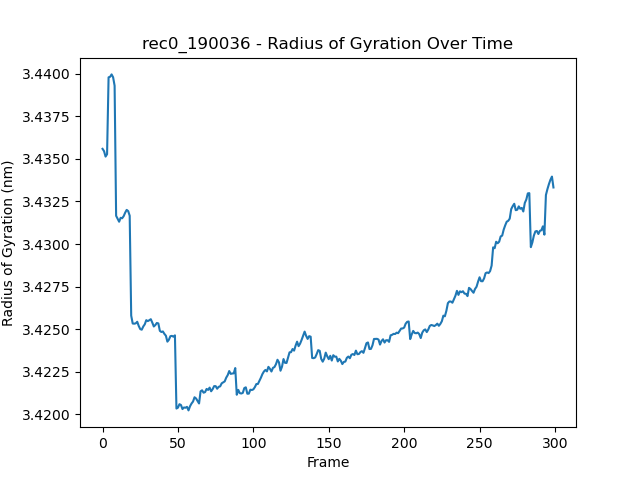

In [26]:
#plot rgy2
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_190714'))